We'll be using differential dynamic microscopy. This technique was first described in 2008 in an article in PRL by Cerbino and Trappe. 
![PRL image](../Tutorials/DDM_Paper_PRL.PNG)

You can find the paper [here](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.100.188102). 

The heart of the DDM code (found in the `ddm.py` file) is the computation of the image structure function. This is found by taking the average of the Fourier transforms of all image *differences*. By "image differences," I mean the result of subtracting two images separated by a given lag time $\Delta t$.

To describe the process mathematically, we find the difference between images separated by some lag time $\Delta t$:
$$\Delta I = I(x,y;t) - I(x,y;t + \Delta t)$$

For a given $\Delta t$ all such image differences are calculated. We then Fourier transform each $\Delta I$ and average all of the same $\Delta t$.

This results in the image structure function $D(q_x,q_y,\Delta t)$.

## Importing the necessary modules

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np #numerical python used for working with arrays, mathematical operations
import pandas as pd
import xarray as xr
import time #useful for timing functions
import sys, os
import glob #glob is helpful for searching for filenames or directories
import scipy #scientific python
import pickle #for saving data

sys.path.append("../PyDDM") #must point to the PyDDM folder
import ddm_analysis_and_fitting as ddm


In [2]:
ddm.ddm.logger.info("Test...")

2022-01-11 20:03:25,467 - DDM Calculations - Test...


## Initiazing DDM_Analysis class and computing the DDM matrix

In [4]:
ddm_calc = ddm.DDM_Analysis("example_data_silica_beads.yml")

2022-01-11 20:03:31,797 - DDM Calculations - File path to image data exists.
2022-01-11 20:03:31,797 - DDM Analysis - Provided metadata: {'pixel_size': 0.242, 'frame_rate': 41.7}


Image shape: 3000-by-128-by-128
Number of frames to use for analysis: 3000
Maximum lag time (in frames): 600
Number of lag times to compute DDM matrix: 40
Applying binning...
Dimensions after binning (3000, 64, 64), the new pixel size 0.484


The file C:/Users/rmcgorty/Documents/GitHub/PyDDM/Examples/images_nobin_40x_128x128_8bit_ddmmatrix.nc already exists. So perhaps the DDM matrix was calculated already?
Do you still want to calculate the DDM matrix? (y/n): y


2022-01-10 16:27:10,419 - DDM Calculations - Running dt = 1...


Calculating the DDM matrix for images_nobin_40x_128x128_8bit.tif...


2022-01-10 16:27:13,384 - DDM Calculations - Running dt = 5...
2022-01-10 16:27:14,740 - DDM Calculations - Running dt = 9...
2022-01-10 16:27:15,911 - DDM Calculations - Running dt = 16...
2022-01-10 16:27:16,870 - DDM Calculations - Running dt = 27...
2022-01-10 16:27:17,711 - DDM Calculations - Running dt = 47...
2022-01-10 16:27:18,547 - DDM Calculations - Running dt = 81...
2022-01-10 16:27:19,305 - DDM Calculations - Running dt = 138...
2022-01-10 16:27:20,029 - DDM Calculations - Running dt = 236...
2022-01-10 16:27:20,715 - DDM Calculations - Running dt = 402...


DDM matrix took 10.905986070632935 seconds to compute.
 Background estimate ± std is 336.15 ± 309.20


<IPython.core.display.Javascript object>


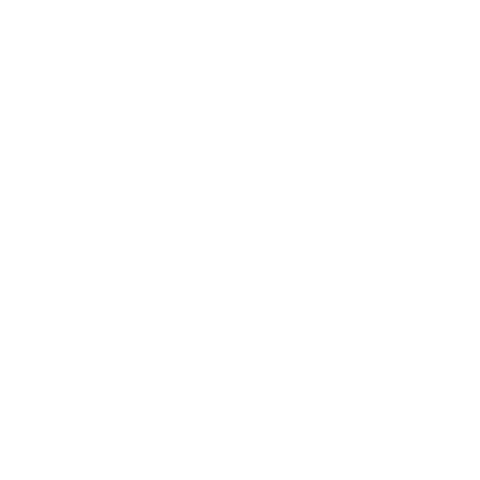

<IPython.core.display.Javascript object>


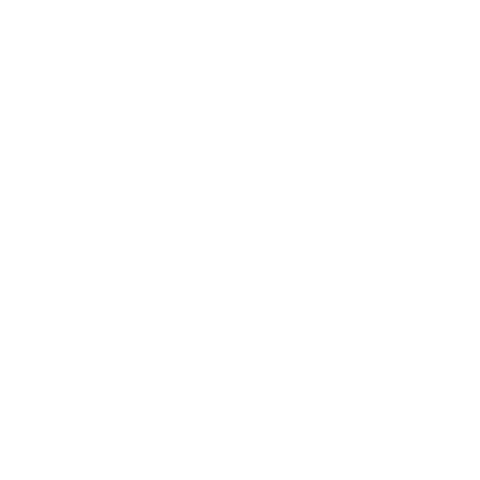

<IPython.core.display.Javascript object>


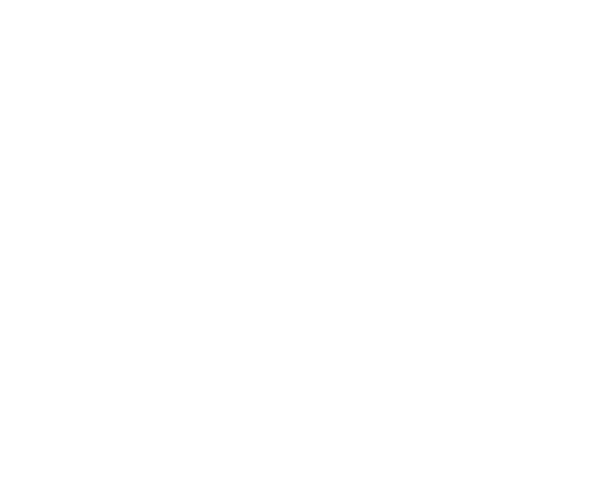

<IPython.core.display.Javascript object>


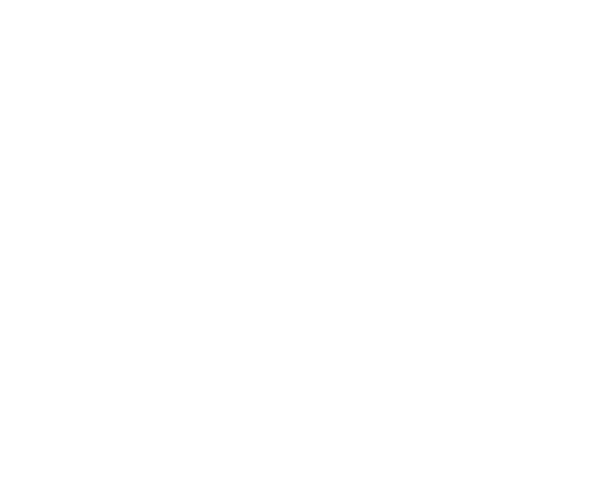

In [3]:
ddm_calc.calculate_DDM_matrix()

## Initiazing DDM_Fit class and fitting our data to a model

In [4]:
ddm_fit = ddm.DDM_Fit(ddm_calc.data_yaml)

,Initial guess,Minimum,Maximum
Amplitude,100.0,1.000,1000000.0
Tau,1.0,0.001,10.0
Background,25000.0,0.000,10000000.0
StretchingExp,1.0,0.500,1.1


Loading file C:/Users/rmcgorty/Documents/GitHub/PyDDM/Examples/images_nobin_40x_128x128_8bit_ddmmatrix.nc ...


In [5]:
print(ddm_fit)


            DDM Fit:
                analysis parameters: example_data_silica_beads.yml
                data directory: C:/Users/rmcgorty/Documents/GitHub/PyDDM/Examples/
                file name: images_nobin_40x_128x128_8bit.tif
                fitting model: DDM Matrix - Single Exponential


In [6]:
fit01 = ddm_fit.fit(name_fit = 'fit01')

In function ddm_fit.get_tau_vs_q_fit, using new tau...
Fit is saved in fittings dictionary with key 'fit01'.


,q,Amplitude,Tau,Background,StretchingExp
0,0.000000,1.000000,10.000000,0.000000,1.100000
1,0.202840,1251.388413,10.000000,31.172241,0.500000
2,0.405681,2112.419116,10.000000,0.000000,0.525011
3,0.608521,2592.625816,3.867011,27.816098,0.710856
4,0.811362,4106.404717,2.558943,21.500231,0.812252
5,1.014202,4617.605429,1.426664,26.013697,0.909577
6,1.217043,4920.697769,1.037616,10.598916,0.912235
7,1.419883,4913.779257,0.742578,8.934480,0.953283
8,1.622723,4671.069001,0.553461,0.000000,0.954699
9,1.825564,5102.521336,0.466177,0.000000,0.976709


In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


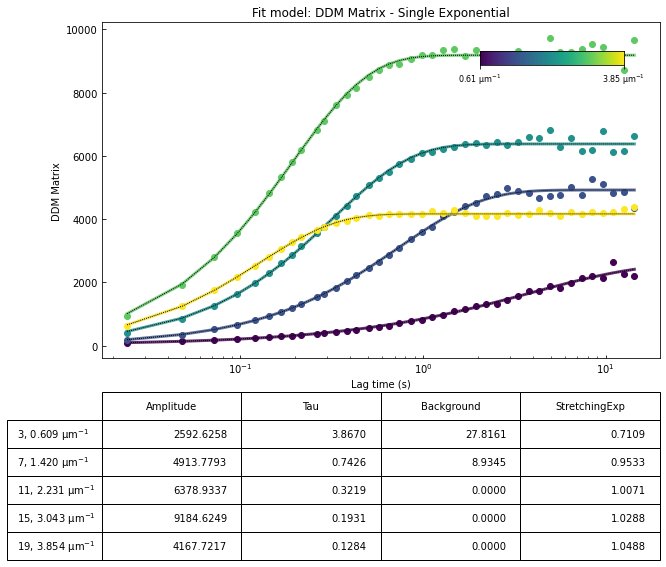

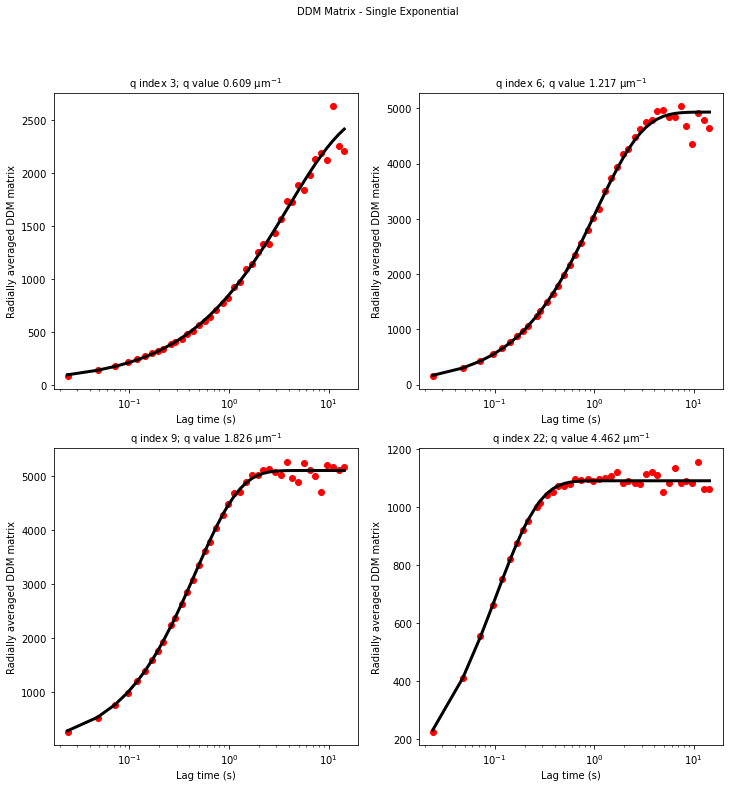

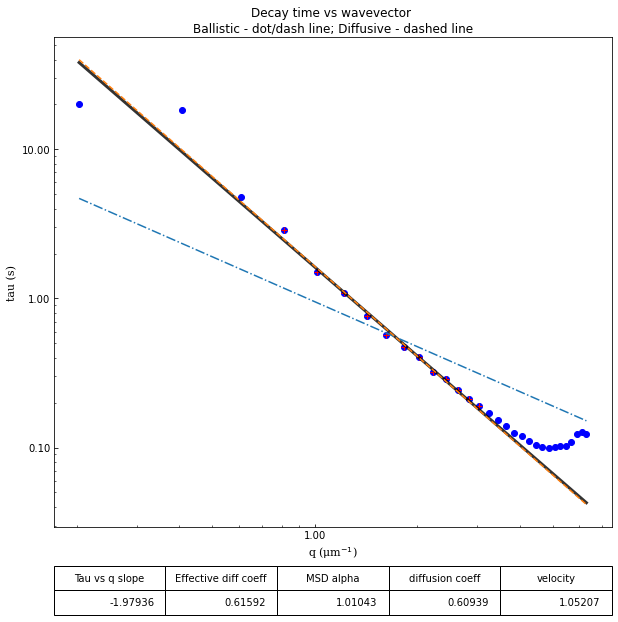

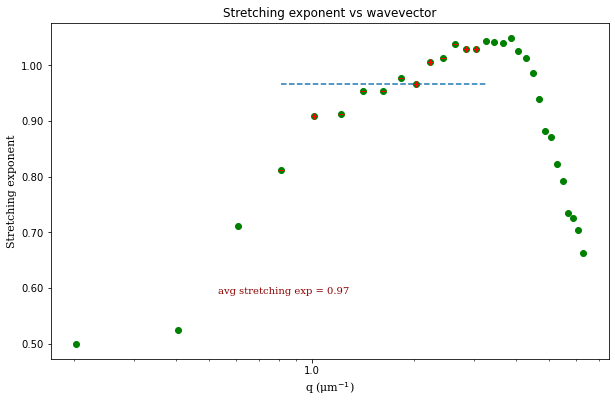

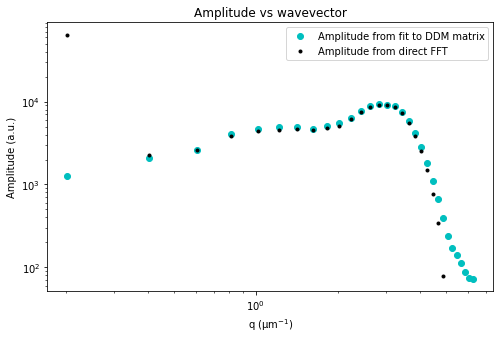

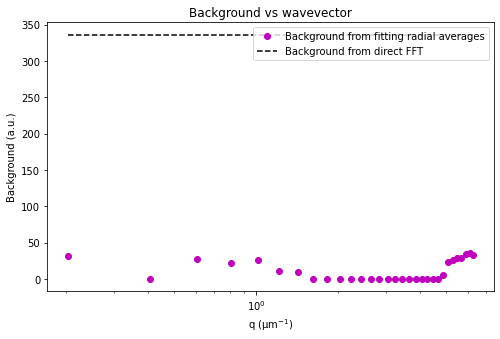

In [7]:
%matplotlib inline
ddm_fit.fit_report(fit01, q_indices=[3,6,9,22], forced_qs=[4,16], use_new_tau=True, show=True)

### Trying a different mathematical model

In [8]:
ddm_fit.reload_fit_model_by_name("ISF - Single Exponential")

,Initial guess,Minimum,Maximum
Tau,1.0,0.001,10.0
StretchingExp,1.0,0.500,1.1


Text(0, 0.5, 'DDM Matrix')

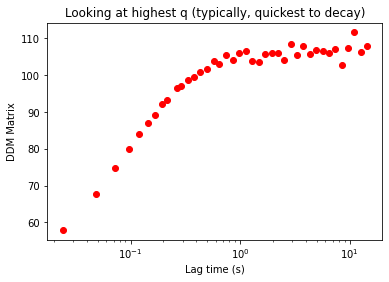

In [9]:
plt.figure()
plt.semilogx(ddm_fit.ddm_dataset.lagtime, ddm_fit.ddm_dataset.ravs[:,-1],'ro')
plt.title("Looking at highest q (typically, quickest to decay)")
plt.xlabel("Lag time (s)")
plt.ylabel("DDM Matrix")

In [10]:
ddm_fit.ddm_dataset = ddm.recalculate_ISF_with_new_background(ddm_fit.ddm_dataset, 10)

In [11]:
fit02 = ddm_fit.fit(name_fit = 'fit02', display_table=False)

In function ddm_fit.get_tau_vs_q_fit, using new tau...
Fit is saved in fittings dictionary with key 'fit02'.


In function ddm_fit.get_tau_vs_q_fit, using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


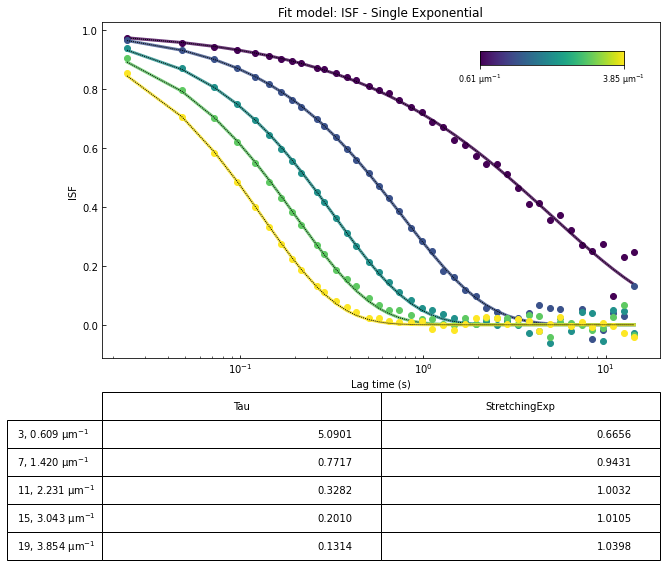

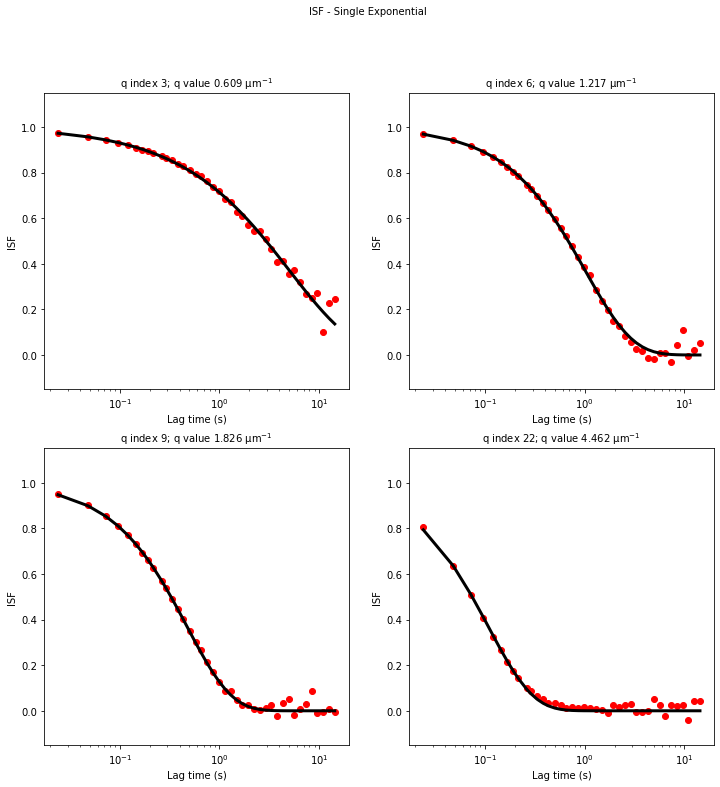

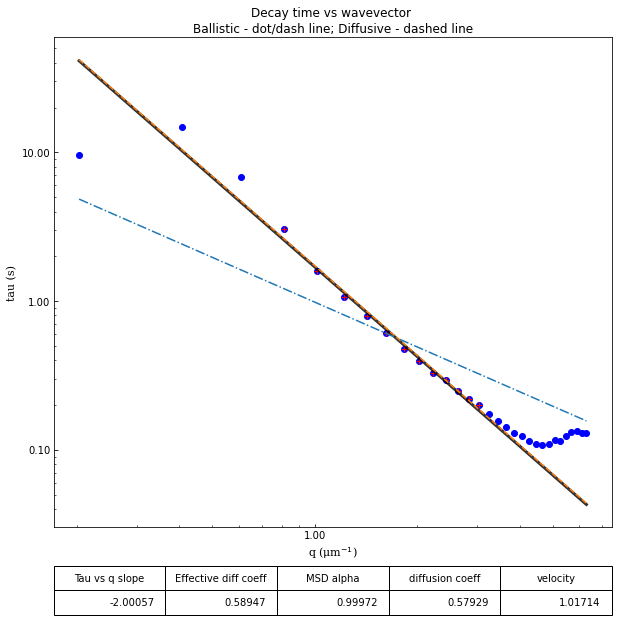

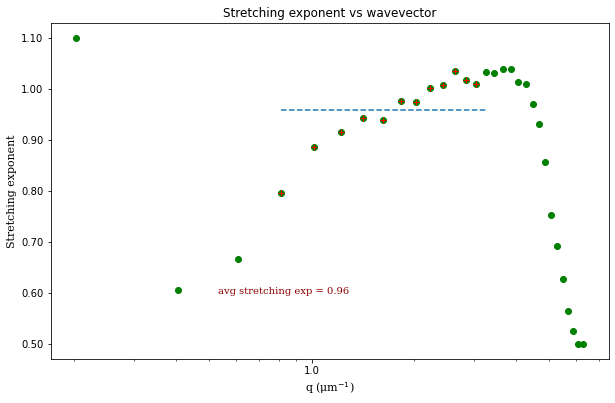

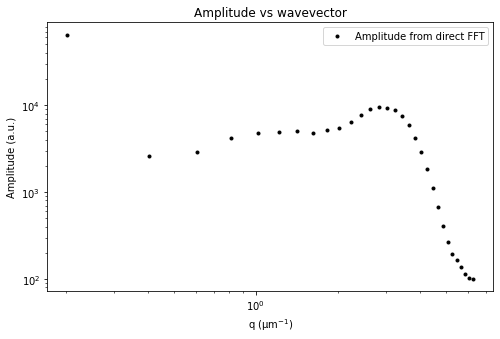

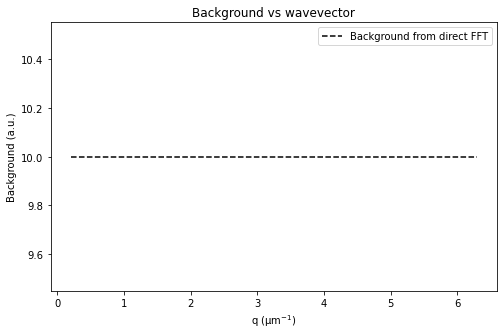

In [12]:
ddm_fit.fit_report(fit02, q_indices=[3,6,9,22], forced_qs=[4,16], use_new_tau=True, show=True)

## Interactive with matplotlib

<IPython.core.display.Javascript object>


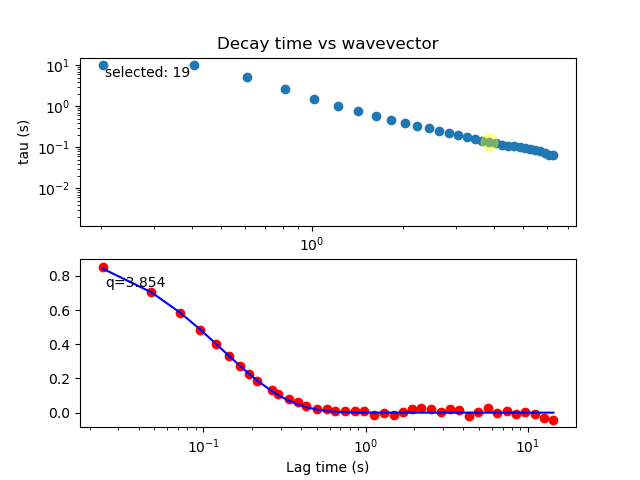

Click on a point in the tau vs q plot to see a fit.
Or press 'N' or 'P' to display next or previous fit.


Text(0, 0.5, 'tau (s)')

In [16]:
%matplotlib notebook
fig, (ax, ax2) = plt.subplots(2, 1)
browser = ddm.Browse_DDM_Fits(fig, ax, ax2, fit02)

fig.canvas.mpl_connect('pick_event', browser.on_pick)
fig.canvas.mpl_connect('key_press_event', browser.on_press)

ax.set_title('Decay time vs wavevector')
ax.set_xlabel("q")
ax.set_ylabel("tau (s)")

## Saving the results

In [ ]:
ddm_fit.save_fit_results_to_excel(fit01)

In [ ]:
fit01.to_netcdf("example_netcdf_file.nc")

In [ ]:
loaded_netcdf_file = xr.open_dataset("example_netcdf_file.nc")